In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [ ]:
#My attempt at making a handmade Linear Regression Model

In [13]:
df = pd.read_csv('gpa_study_hours.csv')

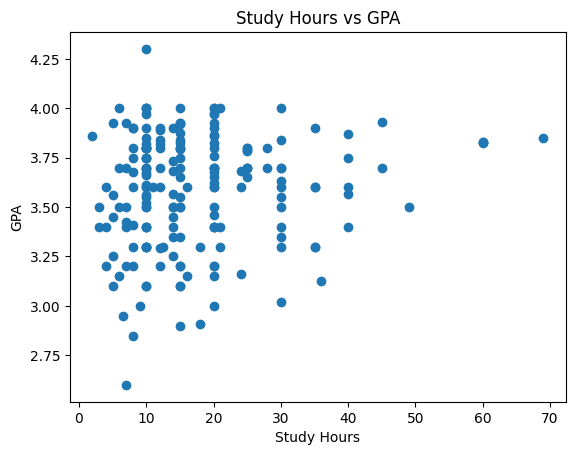

In [14]:
plt.scatter(df.study_hours, df.gpa)
plt.xlabel('Study Hours')
plt.ylabel('GPA')
plt.title('Study Hours vs GPA')
plt.show()


In [15]:
#Not used, but I made a loss function for error
def loss_function(m, b, points):
    total_error = 0
    for i in range(len(points)):
        x = points[i].study_hours
        y = points[i].gpa
        total_error += (y - (m*x + b))**2
    total_error / float(len(points))

In [19]:
#gradient descent function for linear regression
def gradient_descent(m_now, b_now, points, L):
    m_gradient = 0
    b_gradient = 0
    n = (len(points))
    for i in range(n):
        x = points.iloc[i].study_hours
        y = points.iloc[i].gpa
        m_gradient += -(2/n) * x * (y - (m_now*x + b_now))
        b_gradient += -(2/n) * (y - (m_now*x + b_now))
    new_m = m_now - L*m_gradient
    new_b = b_now - L*b_gradient
    return new_m, new_b

In [49]:
#Starting points for model, played around a bit to get a better result, still not perfectly fitted
m = 0
b = df.gpa.min()
L = .00002
epochs = 1000

Epoch 0
0 2.6
Epoch 50
0.02370696906307638 2.6015047285681736
Epoch 100
0.033537755362397254 2.602451158271075
Epoch 150
0.03760681545216251 2.6031655773392846
Epoch 200
0.039283472157544415 2.6037834688207284
Epoch 250
0.0399667515504362 2.6043610887375706
Epoch 300
0.040237563814399996 2.604921796093495
Epoch 350
0.04033711720453316 2.6054752902373215
Epoch 400
0.04036556734286813 2.6060255986916423
Epoch 450
0.04036450131347242 2.606574393896607
Epoch 500
0.04035118709651184 2.6071223704038875
Epoch 550
0.040332794779409126 2.607669816721633
Epoch 600
0.04031230155505327 2.608216852758622
Epoch 650
0.040290943622939855 2.608763528416942
Epoch 700
0.04026923427909869 2.609309864530109
Epoch 750
0.040247386652183914 2.6098558698615775
Epoch 800
0.040225489233942285 2.610401548162954
Epoch 850
0.04020357876380027 2.6109469011047284
Epoch 900
0.040181670492344945 2.611491929493195
Epoch 950
0.04015977074746918 2.612036633775747


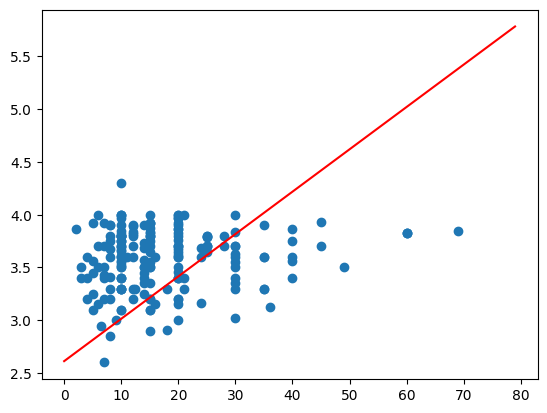

In [50]:
#Running the epochs
for i in range(epochs):
    if i % 50 == 0:
        print(f"Epoch {i}")
        print(m,b)
    m, b = gradient_descent(m, b, df, L)
    
plt.scatter(df.study_hours, df.gpa)
plt.plot(list(range(0, 80)), [m* x + b for x in range(0, 80)], color = 'red')
plt.show()

In [ ]:
#Results are alright! everyting works but it could be more accurate probably